In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def compute_error_for_given_points(b, m, points):
    # return Sum of Square errors (SSE)
    err = 0
    for point in  points:
        err += (point[1] - (m * point[0] + b ))**2
    return err / len(points)

![](SSE.png)

In [7]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    # This will simply run the gradient num_iterations times
    b = starting_b
    m = starting_m

    for _ in range(num_iterations):
        show_points_and_line(points, m, b)
        b, m = gradient(b, m, points, learning_rate)

    return b, m

In [ ]:
def gradient(b, m, points, learning_rate):
    # Here we get the gradient, and return new slope and y-intercept
    b_gradient = 0
    m_gradient = 0
    
    for point in points:
        x = point[0]
        y = point[1]
        
        # get direction withrespect to b and m
        m_gradient += (x * (y - (m * x + b)))
        b_gradient += (y - (m * x + b)) 

    m_gradient = -2/len(points) * m_gradient
    b_gradient = -2/len(points) * b_gradient

    # Update b and m
    new_b = b - (learning_rate * b_gradient)
    new_m = m - (learning_rate * m_gradient)

    return new_b, new_m

![](derivatieves.png)

In [ ]:
def show_points_and_line(points, m, b):
    '''Draw the chart'''
    min_x, max_x = points[0, 0], points[0, 0]
    for point in points:
        # print(point[0], point[1])
        plt.plot(point[0], point[1], 'o', color='blue')
        if min_x>point[0]:
            min_x=point[0]
        elif max_x<point[0]:
            max_x=point[0]
    plt.plot([min_x, max_x], [(m*min_x+b), (m*max_x+b)], color='red')
    plt.gca().set(xlabel="Hours Studyed", ylabel="Marks", title='Hours Studyed VS Marks')
    plt.legend(['Student'])
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211


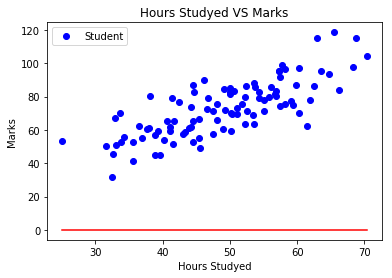

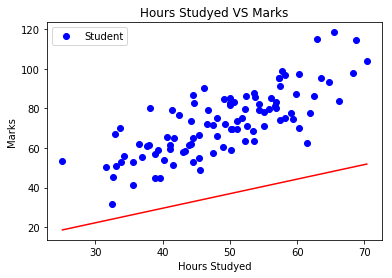

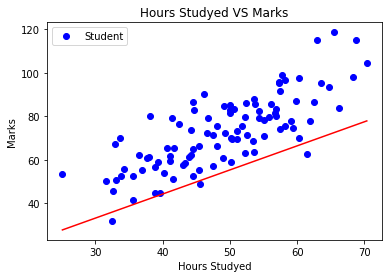

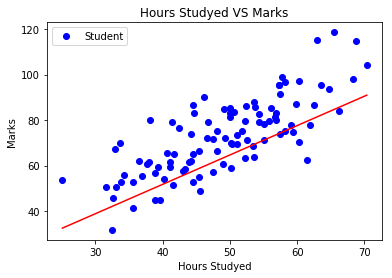

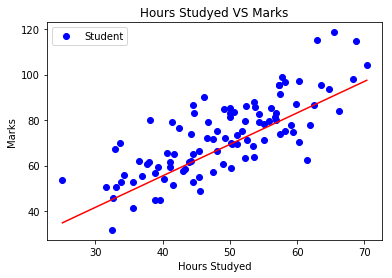

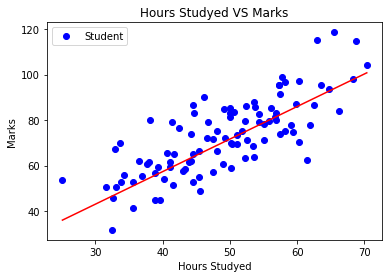

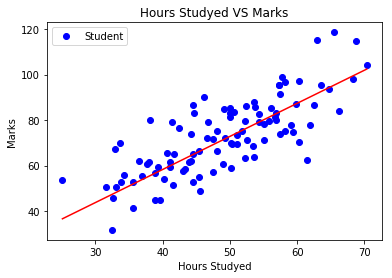

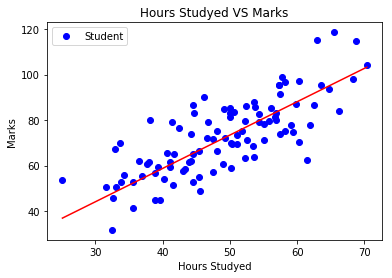

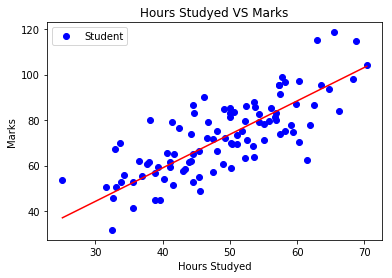

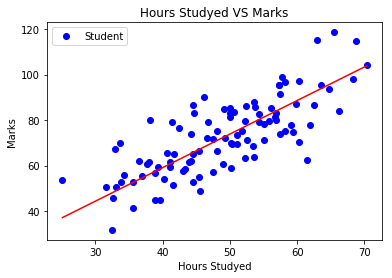

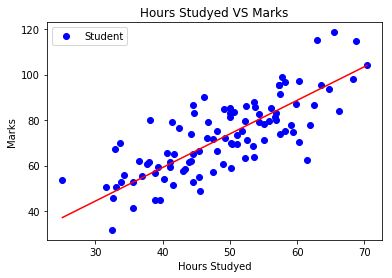

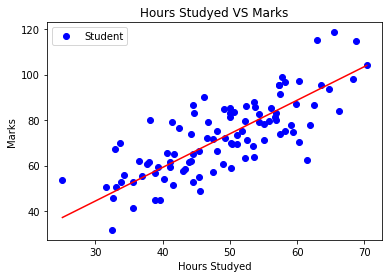

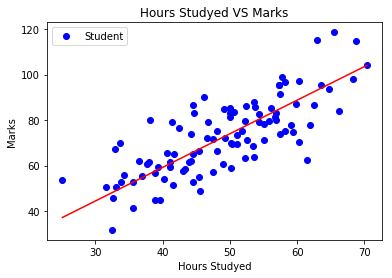

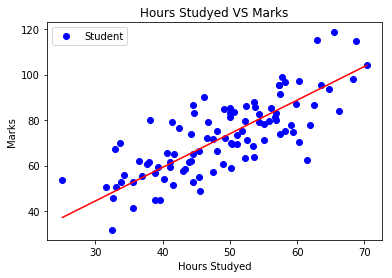

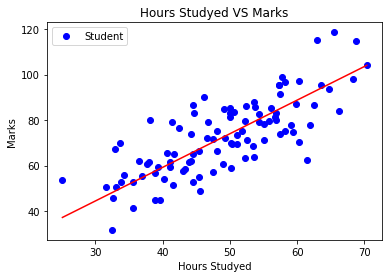

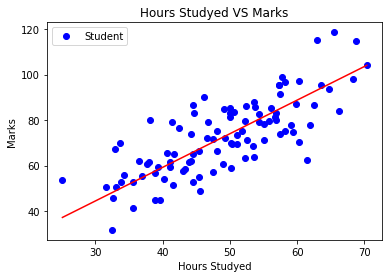

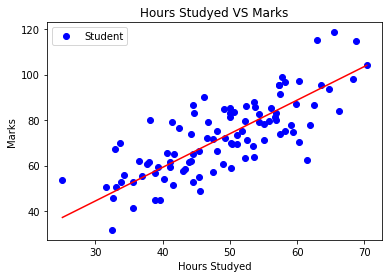

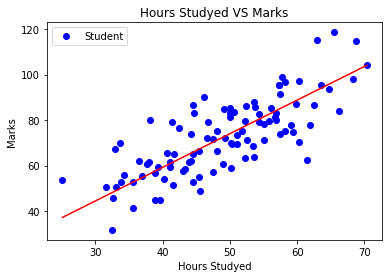

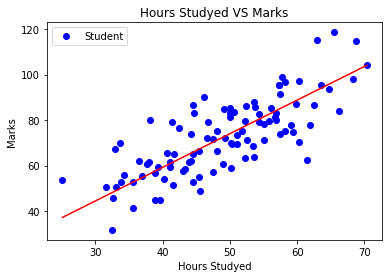

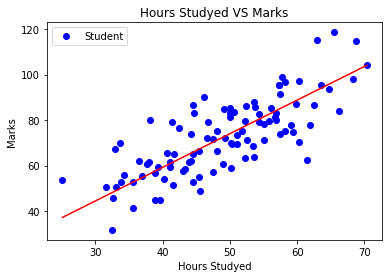

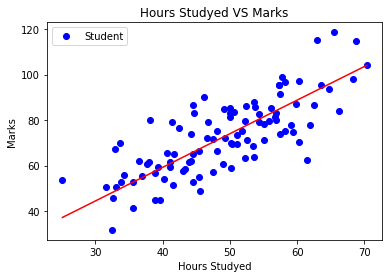

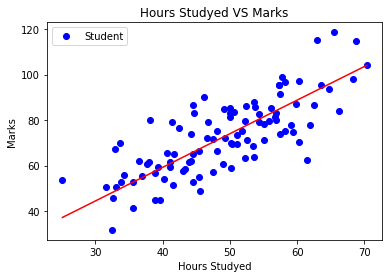

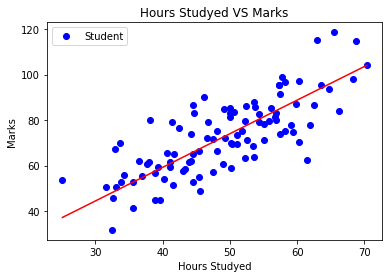

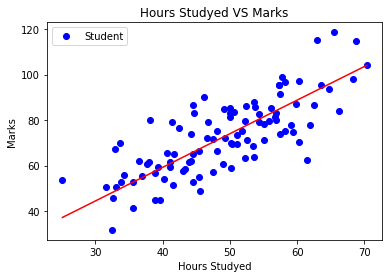

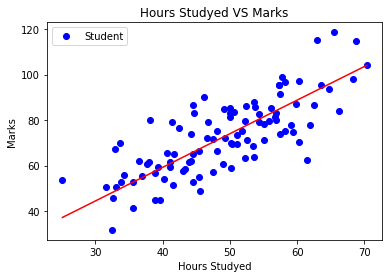

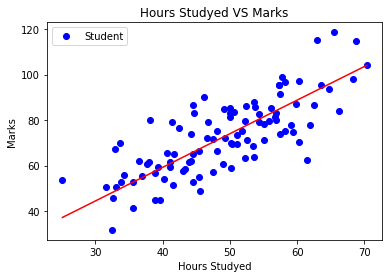

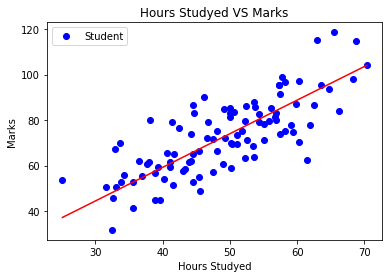

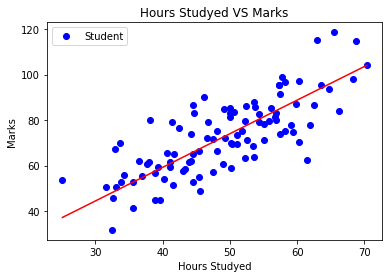

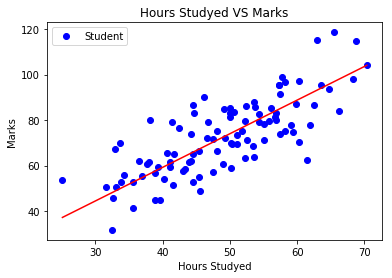

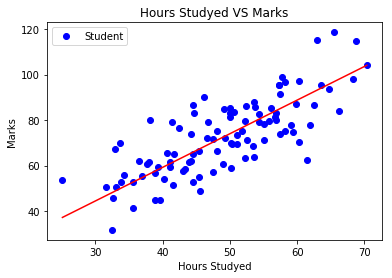

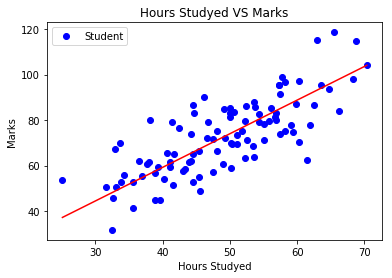

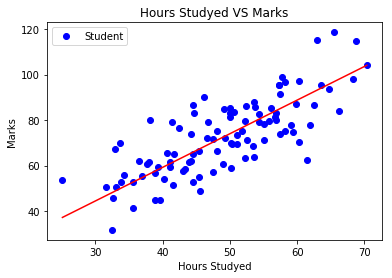

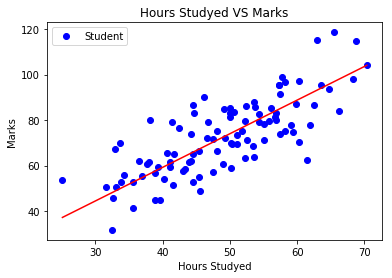

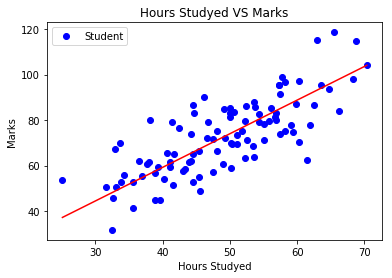

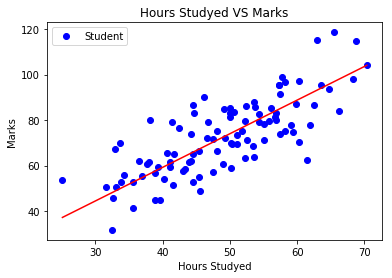

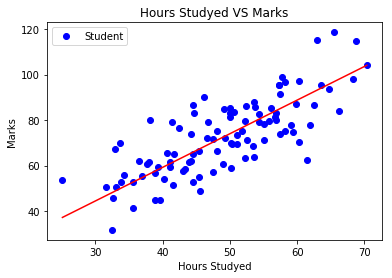

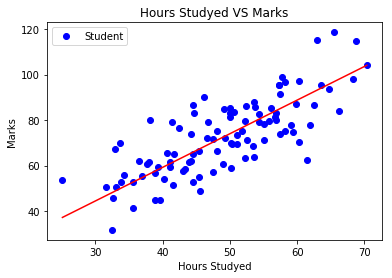

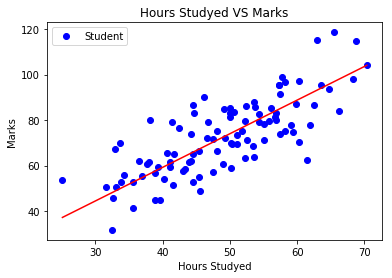

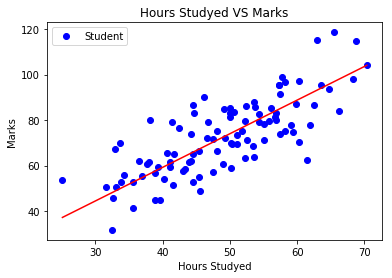

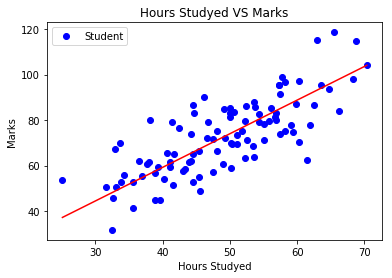

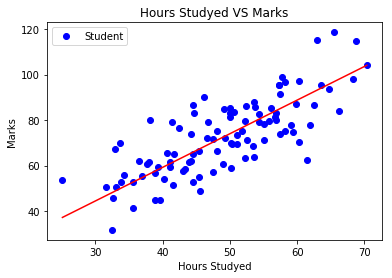

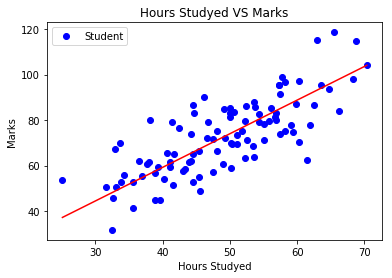

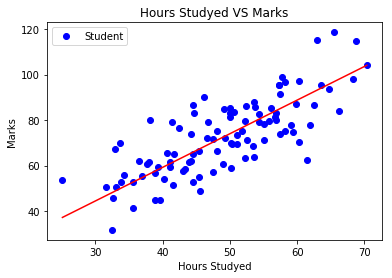

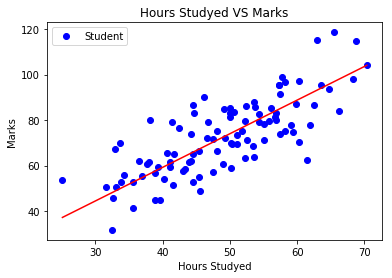

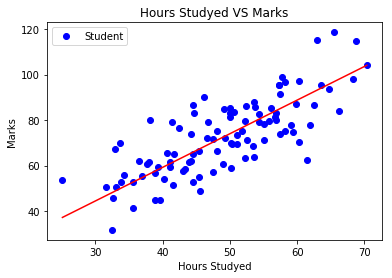

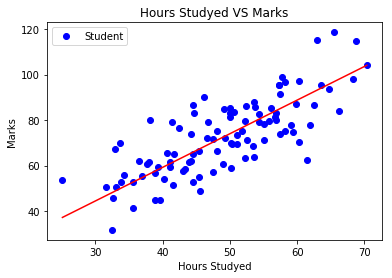

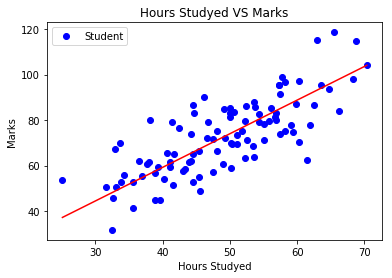

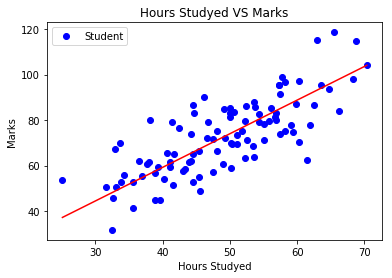

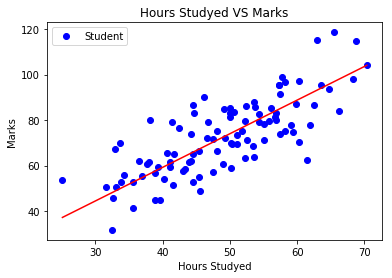

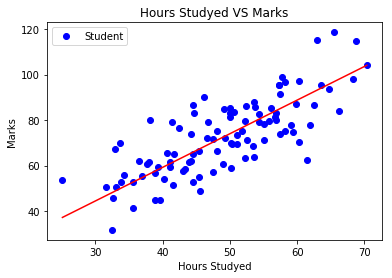

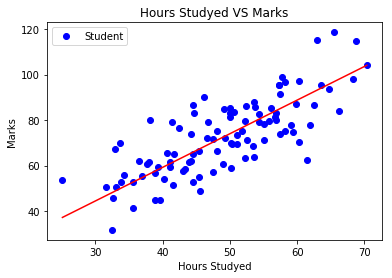

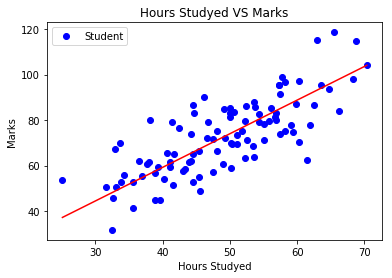

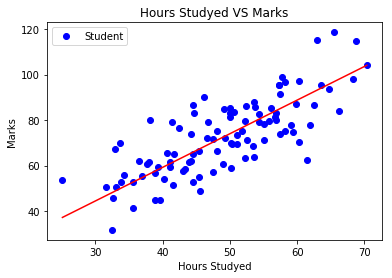

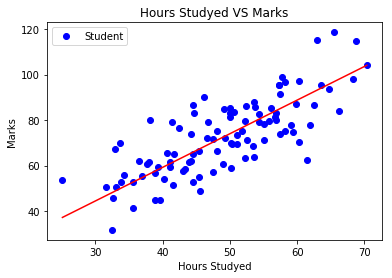

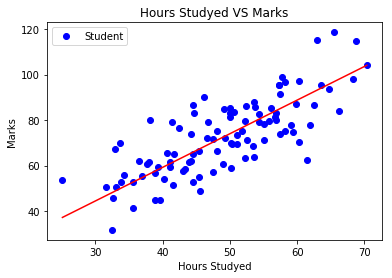

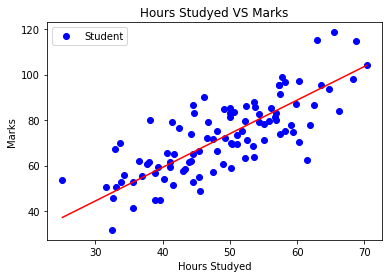

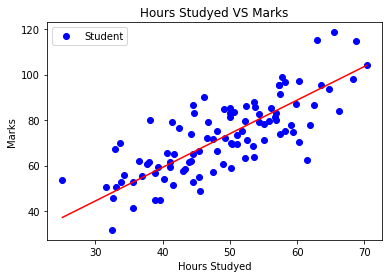

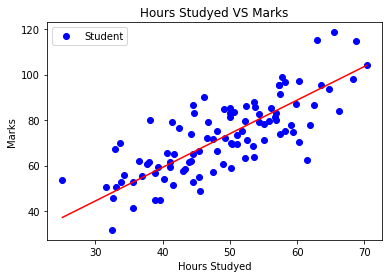

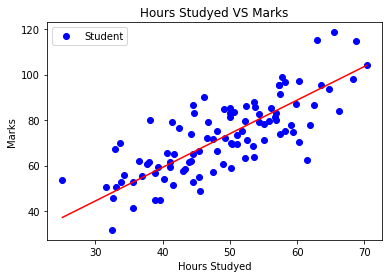

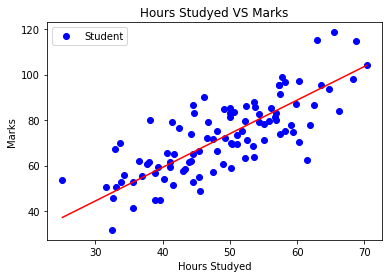

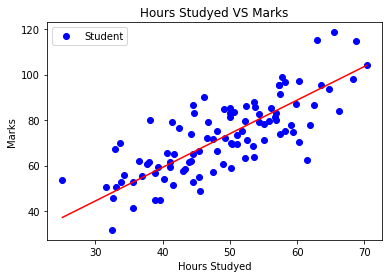

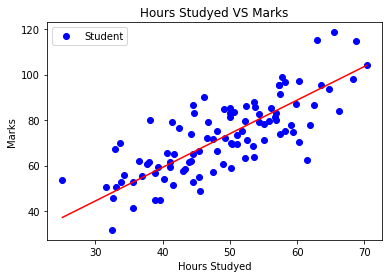

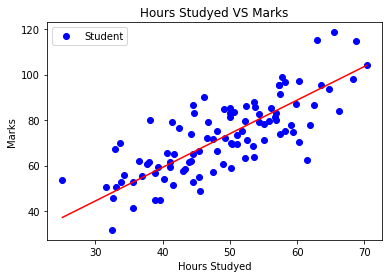

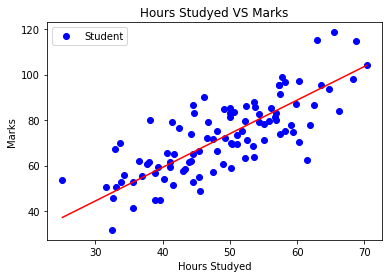

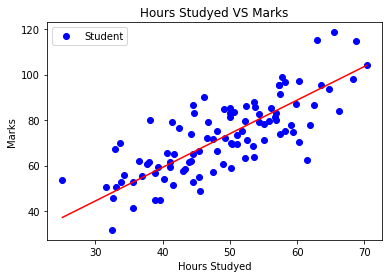

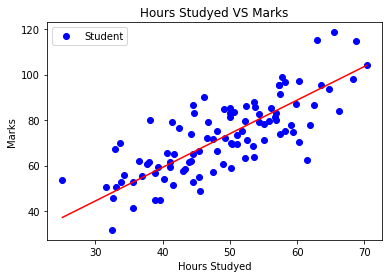

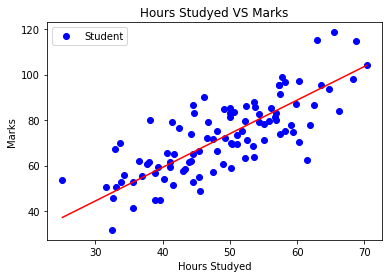

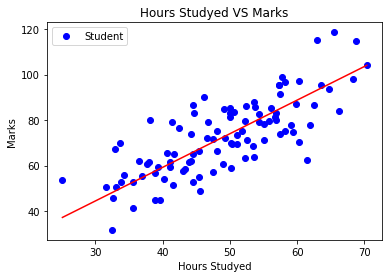

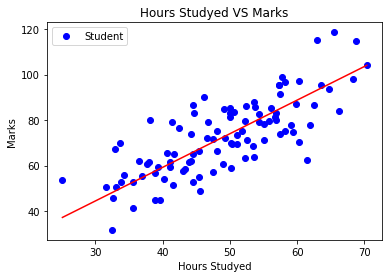

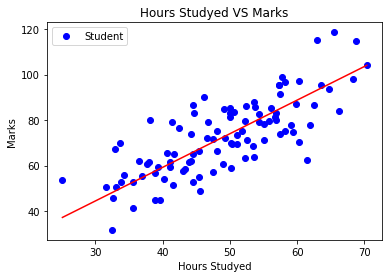

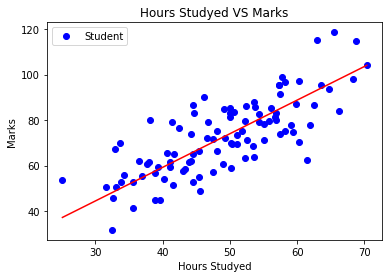

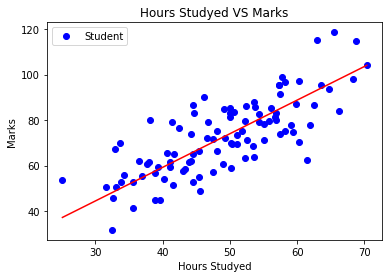

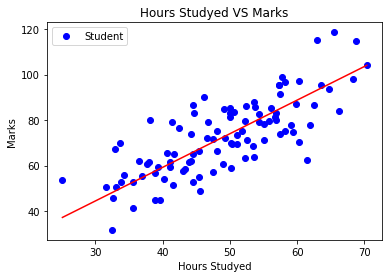

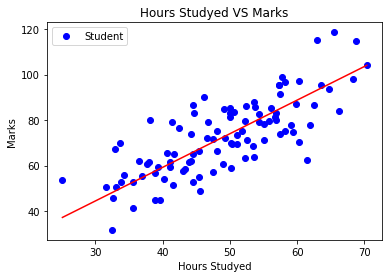

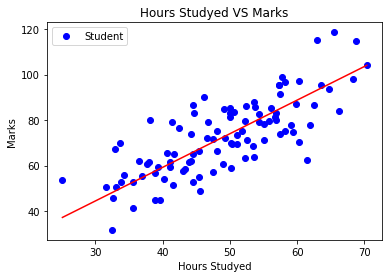

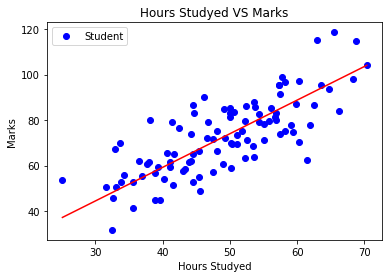

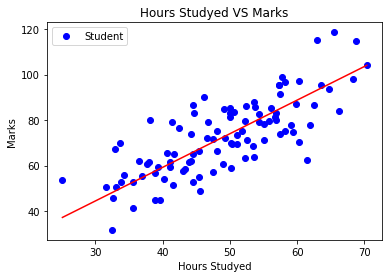

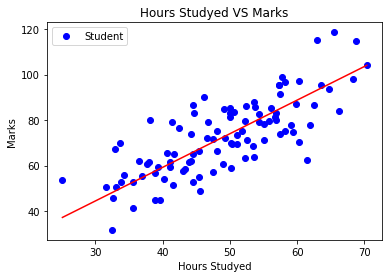

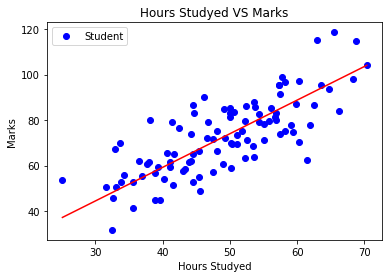

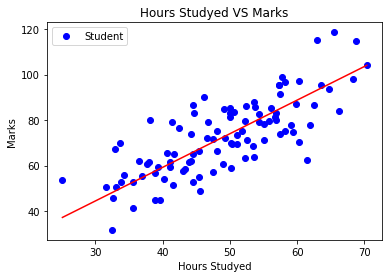

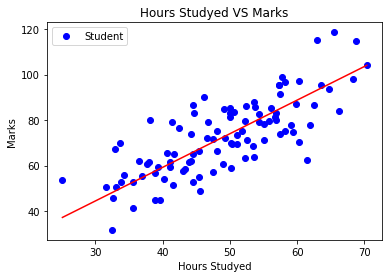

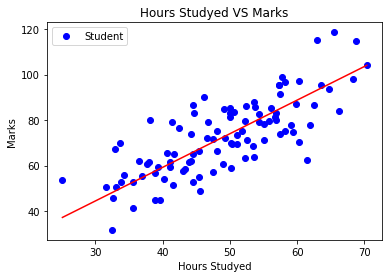

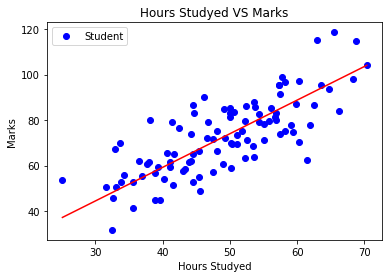

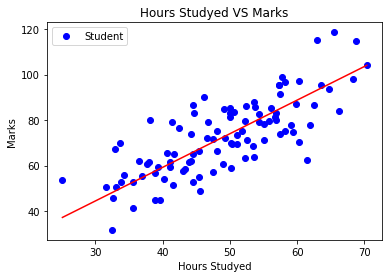

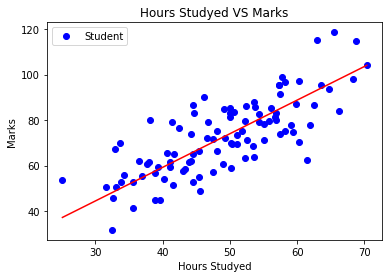

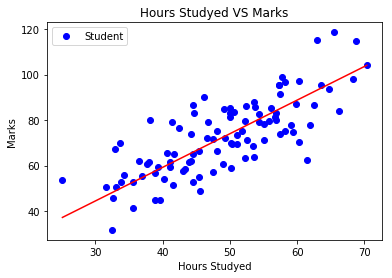

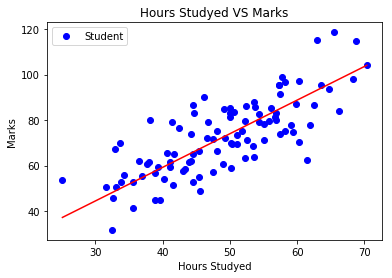

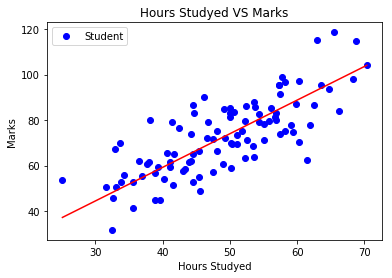

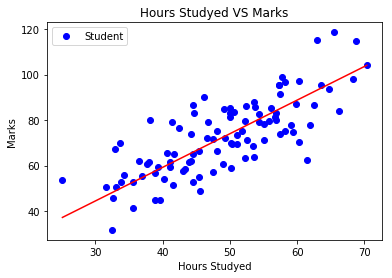

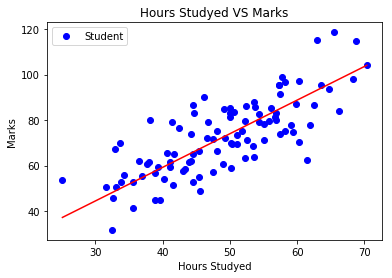

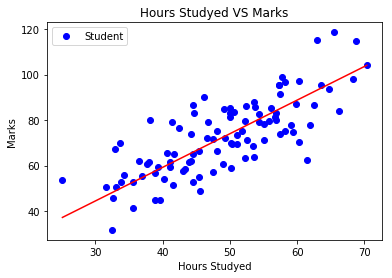

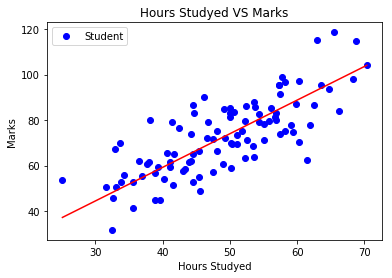

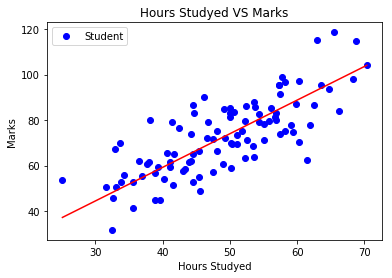

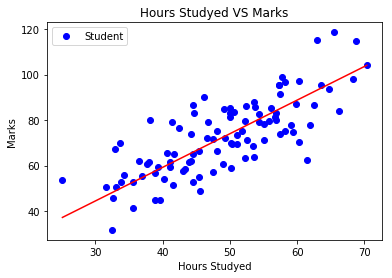

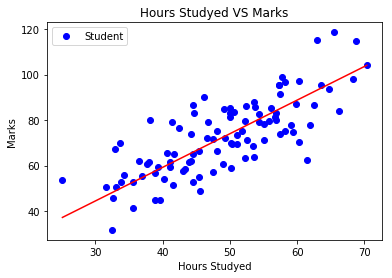

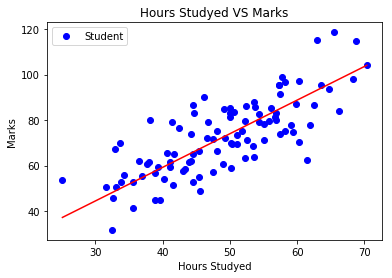

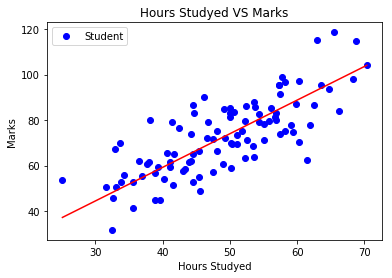

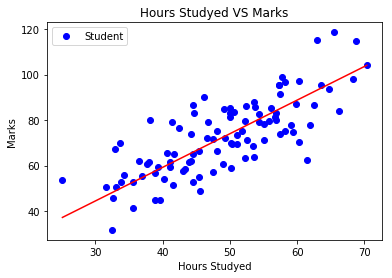

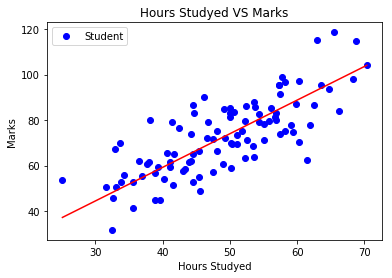

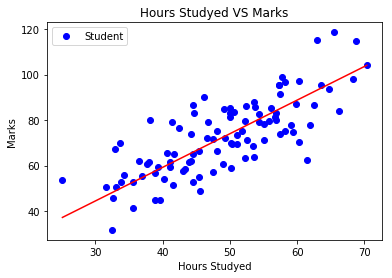

Ending gradient descent at b = 0.03507497059234175, m = 1.4788027175308358, error = 112.64705664288809


In [9]:
# Step 1 : Get data
points = np.genfromtxt('data.csv', delimiter=',')

# Step 2 : Define learning rate
learning_rate = 0.0001
# y = mx + b
init_b = 0
init_m = 0
num_iterations = 100

# Step 3 : Train our model 
print(f"Starting gradient descent at b = {init_b}, m = {init_b}, error = {compute_error_for_given_points(init_b, init_m, points)}")
b, m = gradient_descent_runner(points, init_b, init_m, learning_rate, num_iterations)
print(f"Ending gradient descent at b = {b}, m = {m}, error = {compute_error_for_given_points(b, m, points)}")